In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import math
import random

dataDir = 'c:/Users/llave/Documents/CMS/data/'

In [72]:
imgs = []
fname = "images_bkg_0p25_0.npz"
imgs = np.load(dataDir+fname)['images']
infos = np.load(dataDir+fname)['infos']

In [73]:
reco_e = []
failreco_e = []
for img, info in zip(imgs, infos):
    if(info[4]<0.15):
        reco_e.append(img)
    elif(info[4]>=0.15):
        failreco_e.append(img)
reco_e = np.vstack(reco_e)
reco_e = np.reshape(reco_e[:,1:],(reco_e.shape[0],40,40,4))
failreco_e = np.vstack(failreco_e)
failreco_e = np.reshape(failreco_e[:,1:],(failreco_e.shape[0],40,40,4))

Text(0.5, 1.0, 'Muon')

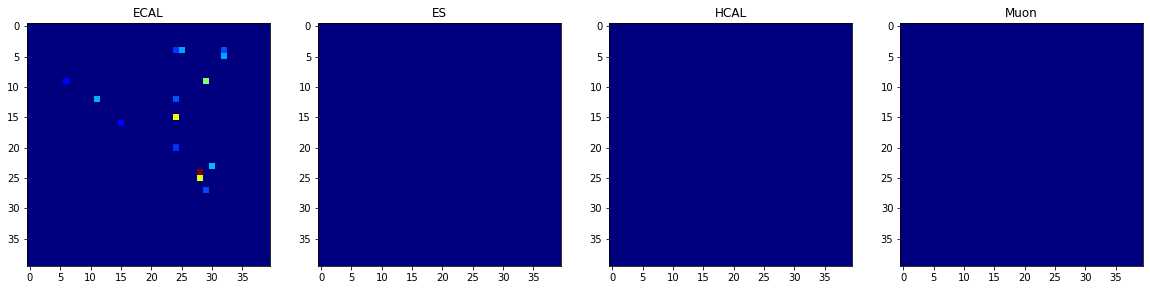

In [105]:
%matplotlib inline

fig, axs = plt.subplots(1,4,figsize=(20,20))
event = failreco_e[22,:,:,:]
event_img = np.zeros((40,40,4))
for i,row in enumerate(event):
    for j,col in enumerate(row):
        for k,pixel in enumerate(col):
            if(pixel > 0): event_img[i,j,k] = np.log(pixel+1)
    
for i in range(4):
    axs[i].imshow(event_img[:,:,i],cmap='jet')

axs[0].set_title("ECAL")
axs[1].set_title("ES")
axs[2].set_title("HCAL")
axs[3].set_title("Muon")

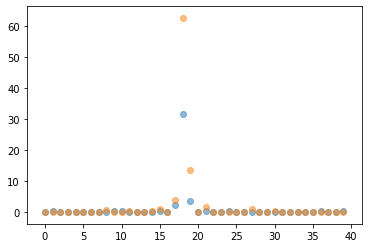

In [149]:
img = mutual[0,:,:,0]
phitot = np.sum(img,axis=0)
img = mutual_theta[0,:,:,0]
phitot2 = np.sum(img,axis=0)
plt.scatter(np.arange(40),phitot,alpha=0.5)
plt.scatter(np.arange(40),phitot2,alpha=0.5)